# Research Notebook
## ISMAEL HAMZA ISMAEL
## Date: 28th/01/2025

# 1: Experience
## Describe at least one research activity you worked on this week. 
Read on *F.Sassano et al*:*Super-critical accretion of medium-weight seed black holes in gaseous proto-galactic nuclei*(Ref[1]).
Wrote code to visualize the relation between the pressure, mass and radius of a neutron star using some equations used as models(Ref[2]).
Attended a journal club meeting and heard from teammates on the riddles of supermassive BHs and the current attemps to solve that.
## Motivation:
A system of equations model the mass  and pressure of neutron stars as functions of the radius (Ref[2]). One equation was derived from Newtonian limit for gravity while the other included GR, we wrote a code that we implemented to visualize these parameters graphically.A resulting ODE from this relations yielded an interesting way for emphasizing the need for GR in certain limits.

Supermassive BHs are puzzling in their own way, for example it isn't clear how they grew to be so massive and the nature of their precursor seeds isn't well understood and so there's an avalanche of articles and papers coming out to attempt to explain these. So *F. Sassano et al* (Ref[1]) tried to provide an attempt at solving some of the mystries in the phenomena via numerical simulations.

<span style="color: red;"> Good </span>

# 2: What? (What happened?)
## Describe what happened during your activities for the week.
To determine the mass of a neutron star, we used four equations(Ref[2]) to plot the results from which we extracted the needed information.This then allowed us to predict the mass of the neutron star using the code below. We got a mass not far off the current accepted value. Moreso, the order of magnitude of the radius is the same as the accepted value. Our code is below:

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

rhoe_list=list(np.logspace(14, 16, 40))

G = 6.673e-8 # dyne-cm^2/g^2
c = 3e10 # cm/s
M_sun = 1.989e33 # solar mass in grams
K0 = 2.03e5 
    
def Hydrostat_Newt(r,y):
    p, m = y
    
    if p<=0:
        return[0,0]
    ro=np.sqrt(p/K0)
    dpdr=(-ro*G*m)/r**2 
    dmdr=4*np.pi*ro*r**2
     
    return np.array([dpdr, dmdr])

def Hydrostat_GR(r, y):
    p, m  = y
    
    if p<=0:
        return[0,0]
    
    ro=np.sqrt(p/K0)
    dpdr = (-ro)*(G*m/r**2)*(1+p/(ro*c**2))*(1+(4*p*np.pi*(r**3)/(m*c**2)))*(1-(2*G*m/(r*c**2)))**(-1)
    dmdr = 4*np.pi*ro*r**2
    
    
    return np.array([dpdr, dmdr])    
    
r_span = (1e-6, 1e7) 
r_eval = np.linspace(r_span[0], r_span[1], 100)

for i in range(len(rhoe_list)):
    roe0=rhoe_list[i]
    r0=1e-6
    p0=K0*roe0**2
    m0=(4/3)*np.pi*roe0*r0**3
    in_cond=np.array([p0, m0])
    newt_solution = solve_ivp(Hydrostat_Newt, r_span, in_cond, t_eval=r_eval)
    M_n = (newt_solution.y[1])
    R_n =(newt_solution.t)
             
for i in range(len(rhoe_list)):
    roe0=rhoe_list[i]
    r0=1e-6
    p0=K0*roe0**2
    m0=(4/3)*np.pi*roe0*r0**3
    in_cond=np.array([p0, m0])
    gr_solution = solve_ivp(Hydrostat_GR, r_span, in_cond, t_eval=r_eval)
    M_gr = gr_solution.y[1]
    R_gr = gr_solution.t
      


R_array_km_n = R_n/1e5    
R_array_km_GR = R_gr/1e5
M_array_Solar_M_n =  M_n/M_sun

print('The mass limit for a neutron star while considering GR is calculated to be ', M_array_Solar_M_GR[-1], ' in solar masses.')

plt.plot(R_array_km_n, np.log(M_array_Solar_M_n), label='Newtonian mass vs radius')
plt.plot(R_array_km_GR, np.log(M_array_Solar_M_GR), label = 'GR mass vs radius' )
plt.xlabel('radius')
plt.ylabel('mass')
plt.title('Mass as a function of radius')
plt.legend()
plt.grid()
plt.show()

The idea was that for a neutron star, a hydrostatic equilibrium is established and the radius for which this occurs is the defined radius of the star. This radius is then used to find the mass(mass itself being a function of radius).
  The *F. Sassano et al* paper shows that for lower coupling efficiencies the accretion rate onto a BH is higher. Moreover, the accretion rate is dependent on the model used to simulate the accretion.

<span style="color: red;"> Add code in a code block. </span>

# 3: So what? (What does it mean?)
## Describe your results
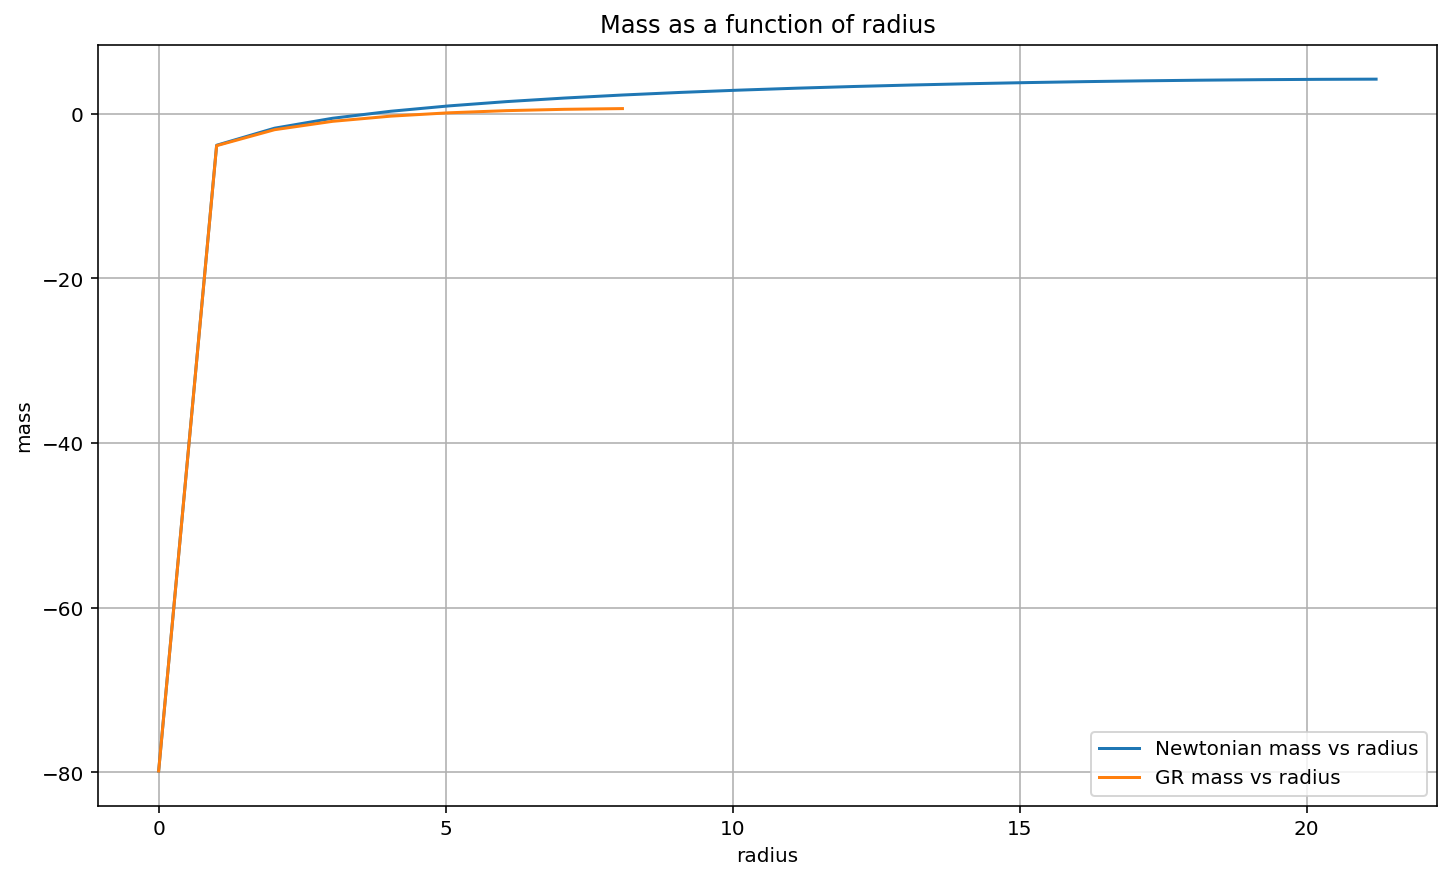![image.png]

*_Figure1_:Graph showing the mass as a function of radius for the Newtonian and GR models*
The GR prediction for mass is less than the Newtonian model as expected and gives a value that is more faithful to observations.

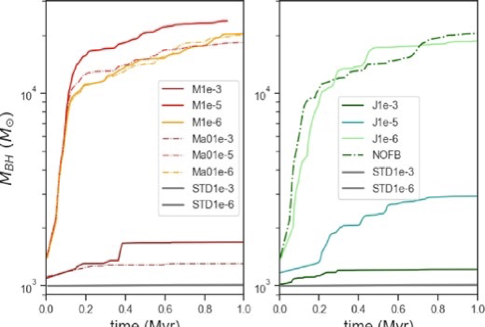

*_Figure2_:BH evolution as a function of time. Left- and right-hand panels show, respectively, results from the slim disc and Jiang models. Grey lines in both panels represent Eddington-limited models.
(Sassano et al.2023)*
As can be seen from the graph, the evolution of the BH mass is dependent on the model used and also on the coupling efficiencies. The coupling efficiencies are indicated by the "1e-n" in the labelling.



<span style="color: red;"> What do these results mean in relation to your research aims? </span>

# 4. Now what? (What's next?)
## Plan for the next week

Now that we have an idea of the current models used to simulate BH accretion, we will be building on this understanding over the coming weeks to understand the relationship between the Stellar mass and gas mass in a galaxy, SFR vs Stellar mass, Metallicity vs Stellar mass, BH vs Gas masses and we will run a simulation to obtain the relationships just stated under low resolution.

<span style="color: red;"> Okay, tie this back to the origianl motivation. How does this further your research goals. </span>

# 5. Bibliography
[1]Federica Sassano, Pedro R Capelo, Lucio Mayer, Raffaella Schneider, Rosa Valiante, Super-critical accretion of medium-weight seed black holes in gaseous proto-galactic nuclei, Monthly Notices of the Royal Astronomical Society, Volume 519, Issue 2, February 2023, Pages 1837–1855, https://doi.org/10.1093/mnras/stac3608
[2]arXiv:nucl-th/0309041v2: https://doi.org/10.48550/arXiv.nucl-th/0309041


<span style="color: red;">Cite using a standard format.</span>

| Category       | Points      |
| ------------- |:------------:|
| Formatting    |       2       |
| Experience    |       2       |
| What?         |       2       |
| So what?      |       2       |
| Now what?     |       3       |
| Bibliography  |       2       |
| Style         |       3       |
| Total         |       16      |